In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mysql-connector-python

  Obtaining dependency information for mysql-connector-python from https://files.pythonhosted.org/packages/e2/a1/d3bfa896437f32d8fc114881f9ce49fd6bb3195c390557f260c7d4d56f9e/mysql_connector_python-9.1.0-cp311-cp311-macosx_13_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 19.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items')  # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Sabina@1976',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = '/Users/mananmehra/Desktop/dataAnalyticsProject'

# Determines the SQL data type for a column based on its data type in a Pandas DataFrame.

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'



for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

### List all unique cities where customers are located.

In [77]:
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Sabina@1976',
    database='ecommerce'
)
cursor = conn.cursor()
query = """select distinct(customer_city) from customers"""
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data,columns=["unique_state"])
df

,unique_state
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


### Count the number of orders placed in 2017.

In [9]:
query = """select count(order_purchase_timestamp) from orders where year(order_purchase_timestamp)=2017; """
cursor.execute(query)
data = cursor.fetchall()
data

[(45101,)]

### Find the total sales per category.

In [11]:
query = """select products.product_category category, round(sum(payments.payment_value),2) sales from products join order_items 
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category;"""
cursor.execute(query)
data = cursor.fetchall()
data

[('perfumery', 506738.66),
 ('Furniture Decoration', 1430176.39),
 ('telephony', 486882.05),
 ('Fashion Bags and Accessories', 218158.28),
 ('bed table bath', 1712553.67),
 ('automotive', 852294.33),
 ('computer accessories', 1585330.45),
 ('housewares', 1094758.13),
 ('babies', 539845.66),
 ('toys', 619037.69),
 ('Furniture office', 646826.49),
 ('Cool Stuff', 779698.0),
 ('HEALTH BEAUTY', 1657373.12),
 ('pet Shop', 311268.97),
 ('General Interest Books', 64694.76),
 ('stationary store', 317440.07),
 ('Watches present', 1429216.68),
 ('PCs', 279121.55),
 ('climatization', 91170.66),
 ('Construction Tools Construction', 241475.63),
 ('sport leisure', 1392127.56),
 ('Bags Accessories', 187151.29),
 ('electronics', 259857.1),
 ('Casa Construcao', 136645.29),
 ('Games consoles', 195480.38),
 ('home appliances', 95532.27),
 ('Garden tools', 838280.75),
 ('Agro Industria e Comercio', 118730.61),
 (None, 252801.71),
 ('audio', 60324.62),
 ('technical books', 24915.44),
 ('Construction Tools 

In [13]:
df = pd.DataFrame(data,columns = ["Category","Sales"])
df

,Category,Sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,Fashion Bags and Accessories,218158.28
4,bed table bath,1712553.67
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


### Calculate the percentage of orders that were paid in installments.

In [19]:
query = """select(((select count(payment_installments) from payments where payment_installments>=1) / (select count(order_id) from payments))*100);"""
cursor.execute(query)
data = cursor.fetchall()
data

[(Decimal('99.9981'),)]

### Count the number of customers from each state. 

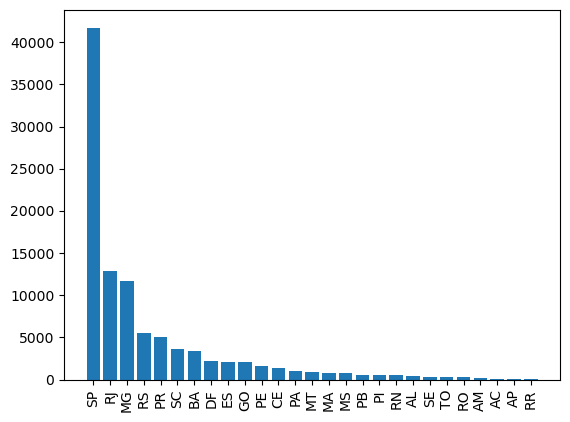

In [31]:
import matplotlib.pyplot as plt
query = """select customer_state, count(customer_id) from customers group by customer_state;"""
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data,columns = ["state","no of people"])
df = df.sort_values(by="no of people",ascending = False)
plt.bar(df["state"],df["no of people"])
plt.xticks(rotation=90)
plt.show()

### Calculate the number of orders per month in 2018.

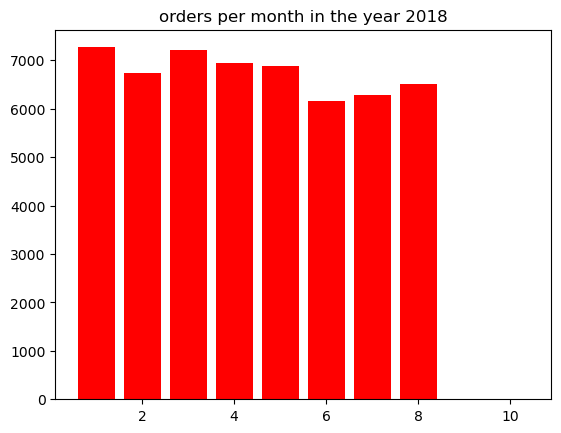

In [40]:
query = """select month(order_purchase_timestamp), count(order_id) from orders where year(order_purchase_timestamp)=2018 group by month(order_purchase_timestamp) order by month(order_purchase_timestamp);"""
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data,columns=["month","order_count"])
plt.bar(df["month"],df["order_count"],color = "red")
plt.title("orders per month in the year 2018")
plt.show()

### Find the average number of products per order, grouped by customer city.

In [41]:
query = """with count_per_order as (select orders.order_id, orders.customer_id , count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id , orders.customer_id)
select customers.customer_city, avg(count_per_order.oc) from customers join count_per_order on customers.customer_id = count_per_order.customer_id
group by customers.customer_city;"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data,columns=["cities",""])
df

,0,1
0,sao jose dos campos,1.1385
1,indaial,1.1154
2,treze tilias,1.2727
3,sao paulo,1.1562
4,rio de janeiro,1.1468
...,...,...
4105,buriti,3.0000
4106,morro agudo de goias,1.0000
4107,santa filomena,1.0000
4108,guamiranga,1.0000


### Calculate the percentage of total revenue contributed by each product category.

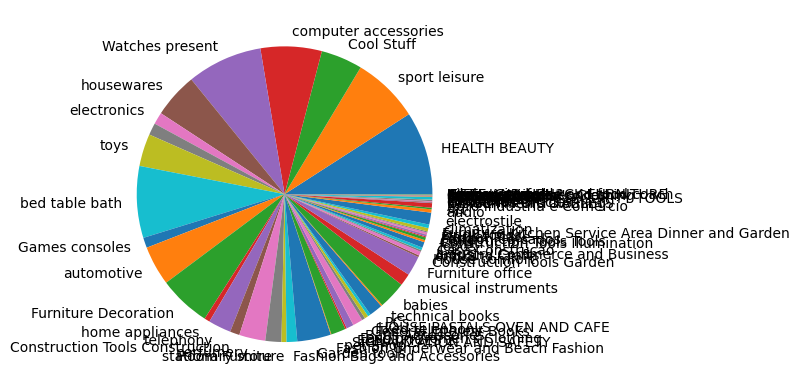

In [50]:
query = """select products.product_category , sum(order_items.price+order_items.freight_value) as total_revenue 
from order_items join products on order_items.product_id = products.product_id group by 
products.product_category;"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data,columns = ["product_category","total_revenue"])
plt.pie(df["total_revenue"],labels=df["product_category"])
plt.show()

### Identify the correlation between product price and the number of times a product has been purchased.

In [57]:
import numpy as np
query = """select products.product_category, count(order_items.product_id),round(avg(order_items.price),2) from products join order_items
on products.product_id = order_items.product_id
group by products.product_category;"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data,columns = ["category","product_count","avg_price"])
arr1 = df["product_count"]
arr2 = df["avg_price"]
np.corrcoef([arr1,arr2]) # this show that order has no effect on price -> neutral relationship
# correlation value is from -1(inversely proportional) to +1(proportional) 

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

### Calculate the total revenue generated by each seller, and rank them by revenue.

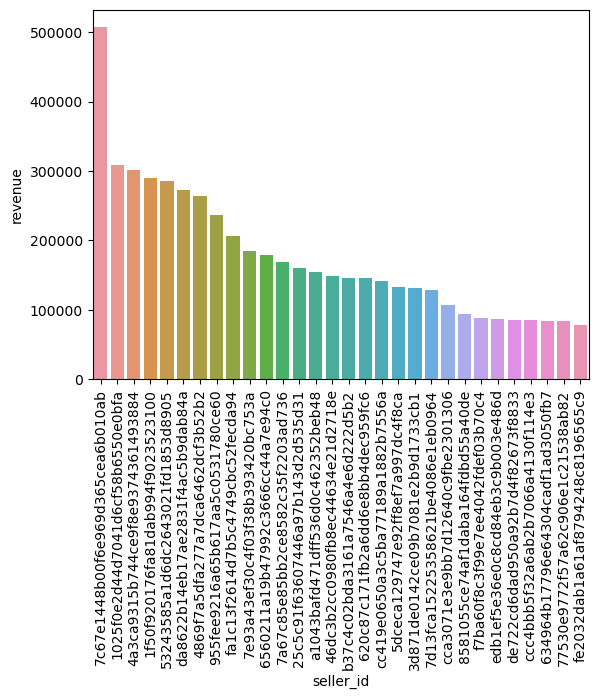

In [70]:
import seaborn as sns
query = """select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["seller_id" , "revenue" ,"rank"])
df = df.head(30)
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

### Calculate the moving average of order values for each customer over their order history.

In [71]:
query = """select customer_id, order_purchase_timestamp,payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment from payments join orders
on payments.order_id = orders.order_id) as a;"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data,columns = ["customer_id","OPT","payment","moving_avg"])
df

,customer_id,OPT,payment,moving_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,0.64,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


### Calculate the cumulative sales per month for each year.

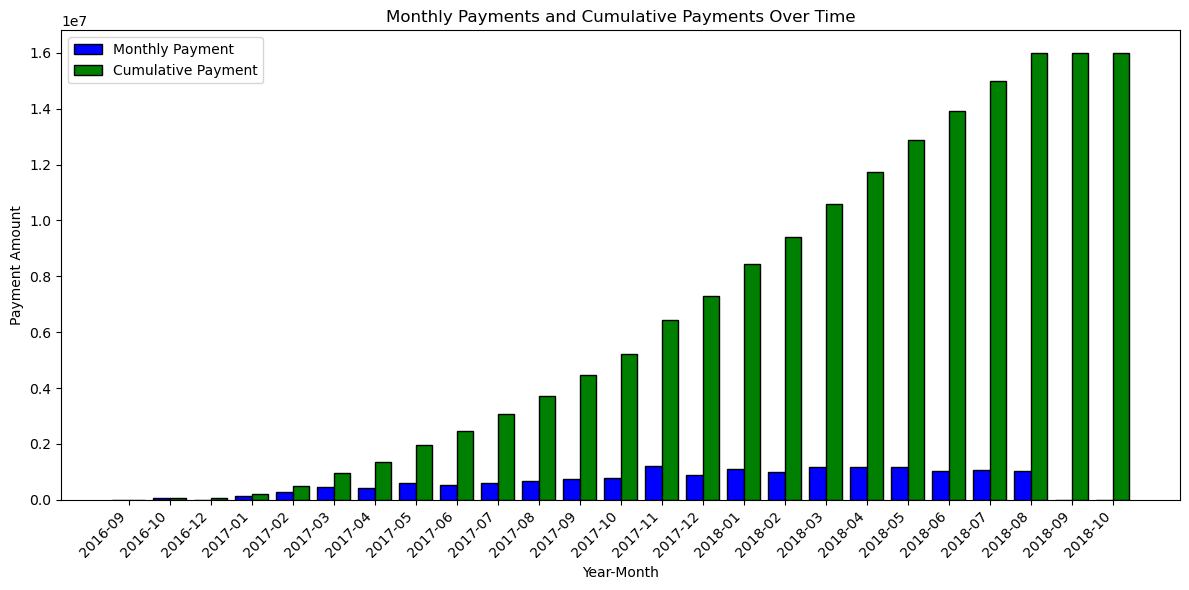

In [73]:
query = """ select years,months,payment,sum(payment) over(order by years,months) as cumulative_payment from
(select year(orders.order_purchase_timestamp) as years,month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment
from orders join payments on orders.order_id = payments.order_id group by year(orders.order_purchase_timestamp),
month(orders.order_purchase_timestamp) order by year(orders.order_purchase_timestamp),
month(orders.order_purchase_timestamp))as a; """
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data,columns = ["years","month","payment","cumulative_payments"])
n = len(df)  # Number of months in the dataset
r = np.arange(n)  # Array of positions for x-axis labels
width = 0.4  # Width of each bar

# Plot payments and cumulative payments as side-by-side bars
plt.figure(figsize=(12, 6))
plt.bar(r, df["payment"], color='b', width=width, edgecolor='black', label='Monthly Payment')
plt.bar(r + width, df["cumulative_payments"], color='g', width=width, edgecolor='black', label='Cumulative Payment')

# Set x-axis labels to show months and years
month_year_labels = [f"{int(year)}-{int(month):02}" for year, month in zip(df["years"], df["month"])]
plt.xticks(r + width / 2, month_year_labels, rotation=45, ha="right")

# Add labels, title, and legend
plt.xlabel("Year-Month")
plt.ylabel("Payment Amount")
plt.title("Monthly Payments and Cumulative Payments Over Time")
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()

### Calculate the year-over-year growth rate of total sales.

In [75]:
query = """with a as (select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment
from orders join payments on orders.order_id = payments.order_id group by year(orders.order_purchase_timestamp)
order by year(orders.order_purchase_timestamp)) 

select years,payment,lag(payment,1) over(order by years) from a;
"""
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data)
df

,0,1,2
0,2016,59362.34,NaN
1,2017,7249746.73,59362.34
2,2018,8699763.05,7249746.73


### Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

### Identify the top 3 customers who spent the most money in each year.